In [1]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

import datetime
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aliqu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
csv_path = "D:/DataRepository/final_project/Final-Project-IMDB-Reviews/labeledTrainData.tsv"

# Import the CSV into a pandas DataFrame
df = pd.read_csv(csv_path, low_memory=False, sep = '\t')
df = df.drop(['id'], axis=1)
df.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
df  = df[['review','sentiment']]
df.head()

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1


In [5]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# stop_words = set(stopwords.words("english")) 

In [6]:


stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

df['Processed_Reviews'] = df.review.apply(lambda x: clean_text(x))



In [7]:
df.head()

,review,sentiment,Processed_Reviews
0,With all this stuff going down at the moment w...,1,stuff go moment mj ive start listen music watc...
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,classic war world timothy hines entertain film...
2,The film starts with a manager (Nicholas Bell)...,0,film start manager nicholas bell give welcome ...
3,It must be assumed that those who praised this...,0,must assume praise film greatest film opera ev...
4,Superbly trashy and wondrously unpretentious 8...,1,superbly trashy wondrously unpretentious 80 ex...


In [8]:
df.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

129.54916

In [20]:
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [18]:
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

In [21]:
maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']

In [22]:
embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 3
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/3


20000/20000 [==============================] - ETA: 8:14 - loss: 0.6942 - acc: 0.460 - ETA: 4:35 - loss: 0.6939 - acc: 0.475 - ETA: 3:18 - loss: 0.6935 - acc: 0.490 - ETA: 2:37 - loss: 0.6935 - acc: 0.490 - ETA: 2:12 - loss: 0.6932 - acc: 0.492 - ETA: 1:55 - loss: 0.6934 - acc: 0.491 - ETA: 1:43 - loss: 0.6934 - acc: 0.491 - ETA: 1:34 - loss: 0.6931 - acc: 0.497 - ETA: 1:27 - loss: 0.6930 - acc: 0.500 - ETA: 1:21 - loss: 0.6930 - acc: 0.500 - ETA: 1:17 - loss: 0.6926 - acc: 0.506 - ETA: 1:13 - loss: 0.6925 - acc: 0.506 - ETA: 1:09 - loss: 0.6923 - acc: 0.508 - ETA: 1:07 - loss: 0.6925 - acc: 0.502 - ETA: 1:04 - loss: 0.6925 - acc: 0.500 - ETA: 1:02 - loss: 0.6926 - acc: 0.495 - ETA: 1:00 - loss: 0.6926 - acc: 0.493 - ETA: 58s - loss: 0.6924 - acc: 0.496 - ETA: 56s - loss: 0.6923 - acc: 0.50 - ETA: 55s - loss: 0.6921 - acc: 0.51 - ETA: 54s - loss: 0.6919 - acc: 0.51 - ETA: 52s - loss: 0.6917 - acc: 0.52 - ETA: 51s - loss: 0.6916 - acc: 0.53 - ETA: 50s - loss: 0.6915 - acc: 0.54 - ETA: 5

20000/20000 [==============================] - ETA: 39s - loss: 0.2593 - acc: 0.92 - ETA: 37s - loss: 0.2737 - acc: 0.89 - ETA: 37s - loss: 0.2659 - acc: 0.89 - ETA: 36s - loss: 0.2683 - acc: 0.90 - ETA: 40s - loss: 0.2657 - acc: 0.90 - ETA: 42s - loss: 0.2560 - acc: 0.90 - ETA: 41s - loss: 0.2557 - acc: 0.90 - ETA: 40s - loss: 0.2523 - acc: 0.90 - ETA: 40s - loss: 0.2519 - acc: 0.91 - ETA: 39s - loss: 0.2570 - acc: 0.90 - ETA: 39s - loss: 0.2542 - acc: 0.90 - ETA: 38s - loss: 0.2623 - acc: 0.90 - ETA: 38s - loss: 0.2609 - acc: 0.90 - ETA: 37s - loss: 0.2575 - acc: 0.90 - ETA: 37s - loss: 0.2581 - acc: 0.90 - ETA: 36s - loss: 0.2530 - acc: 0.90 - ETA: 36s - loss: 0.2550 - acc: 0.90 - ETA: 35s - loss: 0.2540 - acc: 0.90 - ETA: 35s - loss: 0.2496 - acc: 0.91 - ETA: 35s - loss: 0.2450 - acc: 0.91 - ETA: 35s - loss: 0.2468 - acc: 0.91 - ETA: 34s - loss: 0.2424 - acc: 0.91 - ETA: 34s - loss: 0.2452 - acc: 0.91 - ETA: 34s - loss: 0.2466 - acc: 0.91 - ETA: 33s - loss: 0.2457 - acc: 0.91 - ETA

20000/20000 [==============================] - ETA: 36s - loss: 0.1685 - acc: 0.95 - ETA: 39s - loss: 0.1573 - acc: 0.95 - ETA: 37s - loss: 0.1419 - acc: 0.97 - ETA: 37s - loss: 0.1395 - acc: 0.96 - ETA: 36s - loss: 0.1521 - acc: 0.96 - ETA: 36s - loss: 0.1630 - acc: 0.95 - ETA: 36s - loss: 0.1677 - acc: 0.95 - ETA: 36s - loss: 0.1788 - acc: 0.94 - ETA: 35s - loss: 0.1779 - acc: 0.94 - ETA: 35s - loss: 0.1758 - acc: 0.94 - ETA: 35s - loss: 0.1732 - acc: 0.94 - ETA: 35s - loss: 0.1770 - acc: 0.94 - ETA: 35s - loss: 0.1754 - acc: 0.94 - ETA: 38s - loss: 0.1732 - acc: 0.94 - ETA: 38s - loss: 0.1793 - acc: 0.94 - ETA: 38s - loss: 0.1750 - acc: 0.94 - ETA: 37s - loss: 0.1729 - acc: 0.94 - ETA: 37s - loss: 0.1715 - acc: 0.94 - ETA: 36s - loss: 0.1718 - acc: 0.94 - ETA: 36s - loss: 0.1717 - acc: 0.94 - ETA: 35s - loss: 0.1711 - acc: 0.94 - ETA: 35s - loss: 0.1666 - acc: 0.94 - ETA: 35s - loss: 0.1649 - acc: 0.94 - ETA: 35s - loss: 0.1631 - acc: 0.94 - ETA: 34s - loss: 0.1658 - acc: 0.94 - ETA

In [26]:
csv_path = "D:/DataRepository/final_project/Final-Project-IMDB-Reviews/testData.tsv"

# Import the CSV into a pandas DataFrame
df_test = pd.read_csv(csv_path, low_memory=False, sep = '\t')

df_test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [27]:
df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]
list_sentences_test = df_test["review"]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

F1-score: 0.8584793401994173
Confusion matrix:


array([[11090,  2039],
       [ 1410, 10461]], dtype=int64)

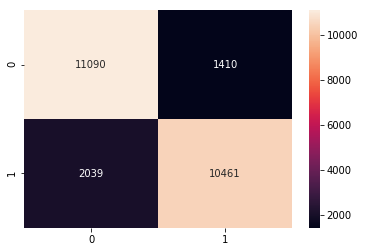

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
